# File to make plots

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.dates as mdates
import datetime
import numpy as np

## Boxplots

Hans area daily 

In [34]:
def plot_boxplot(values, threshold, path, title):
    """
    Trace un boxplot à partir d'un dictionnaire dont les clés sont les 12 mois
    et les valeurs sont des listes de paires (valeur, date).
    Affiche les dates des valeurs dépassant threshold.
    """
    months = list(values.keys())
    data = [[val for val, _ in values[month]] for month in months]
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data)
    
    # Ajout des annotations pour les valeurs dépassant threshold
    for month_idx, month in enumerate(months):
        for val, date in values[month]:
            if val > threshold:
                plt.text(month_idx, val, '  '+date, ha='left', fontsize=8, color='red')
    
    plt.xticks(ticks=range(len(months)), labels=months, rotation=45)
    plt.xlabel("Months")
    plt.ylabel("Precipitations (m)")
    plt.title(title)
    
    plt.savefig(path)

    plt.show()

In [35]:
with open('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-daily_0.25_monthly.pkl', 'rb') as inp:
    dailyValues = pickle.load(inp)
with open('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean2_0.25_monthly.pkl', 'rb') as inp:
    mean2Values = pickle.load(inp)
with open('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean3_0.25_monthly.pkl', 'rb') as inp:
    mean3Values = pickle.load(inp)

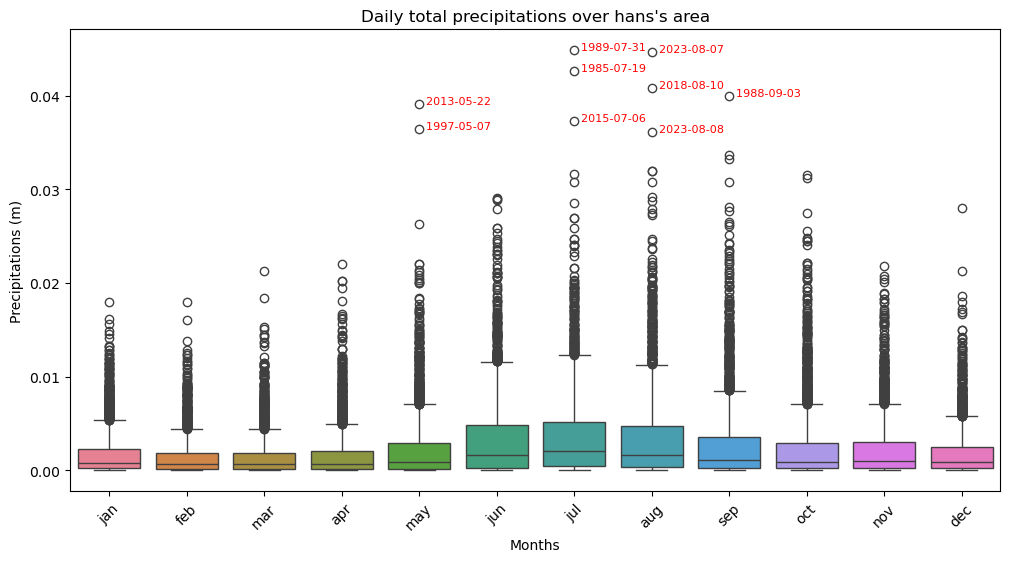

In [36]:
plot_boxplot(dailyValues, 0.035, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/daily_tp_hans-area.png', "Daily total precipitations over hans's area")

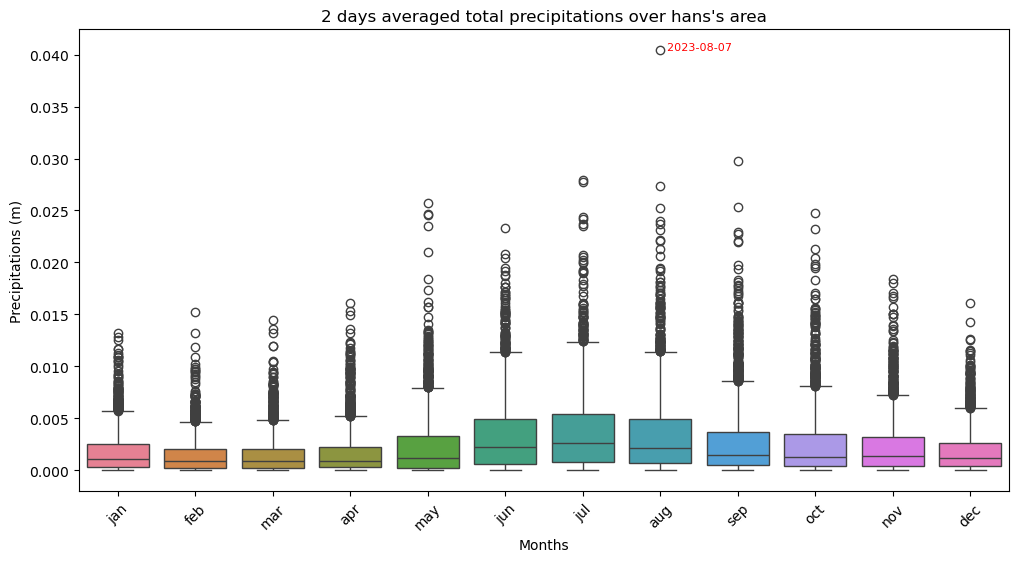

In [37]:
plot_boxplot(mean2Values, 0.03, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/mean2_tp_hans-area.png', "2 days averaged total precipitations over hans's area")

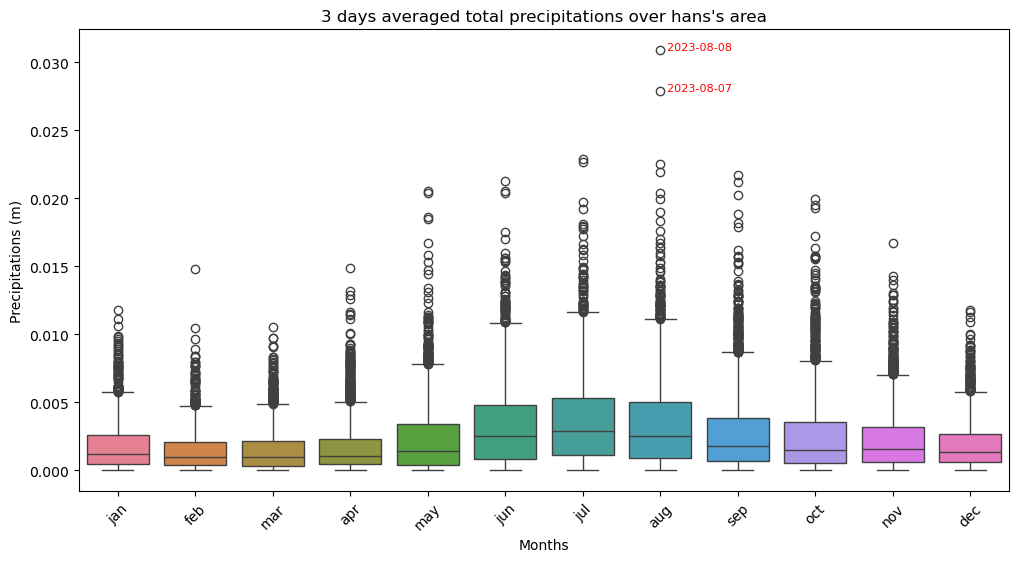

In [38]:
plot_boxplot(mean3Values, 0.025, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/mean3_tp_hans-area.png', "3 days averaged total precipitations over hans's area")

In [39]:
with open('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-daily_0.25_monthly-max.pkl', 'rb') as inp:
    maxDailyValues = pickle.load(inp)
with open('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean2_0.25_monthly-max.pkl', 'rb') as inp:
    maxMean2Values = pickle.load(inp)
with open('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean3_0.25_monthly-max.pkl', 'rb') as inp:
    maxMean3Values = pickle.load(inp)

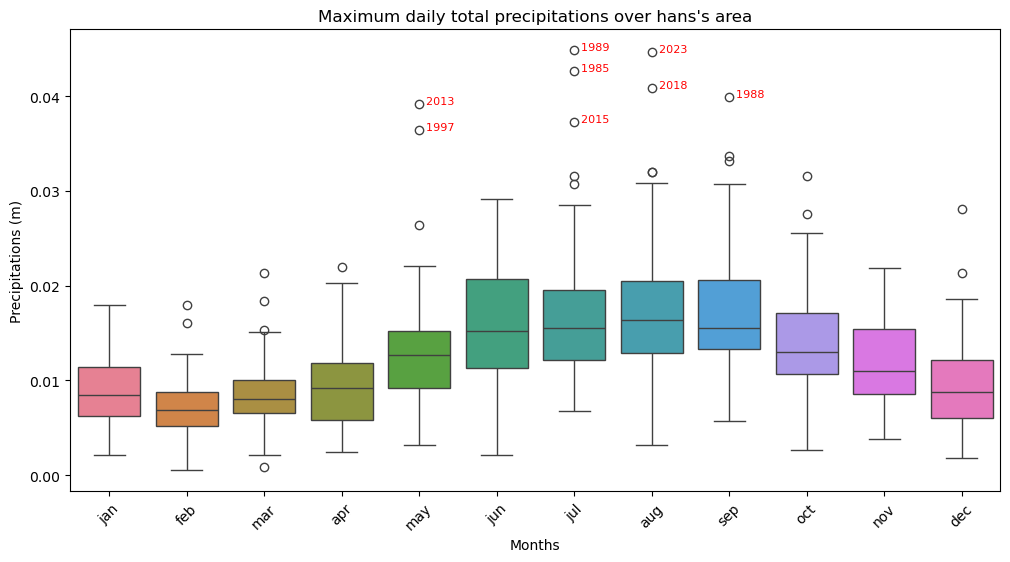

In [40]:
plot_boxplot(maxDailyValues, 0.035, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/max-daily_tp_hans-area.png', "Maximum daily total precipitations over hans's area")

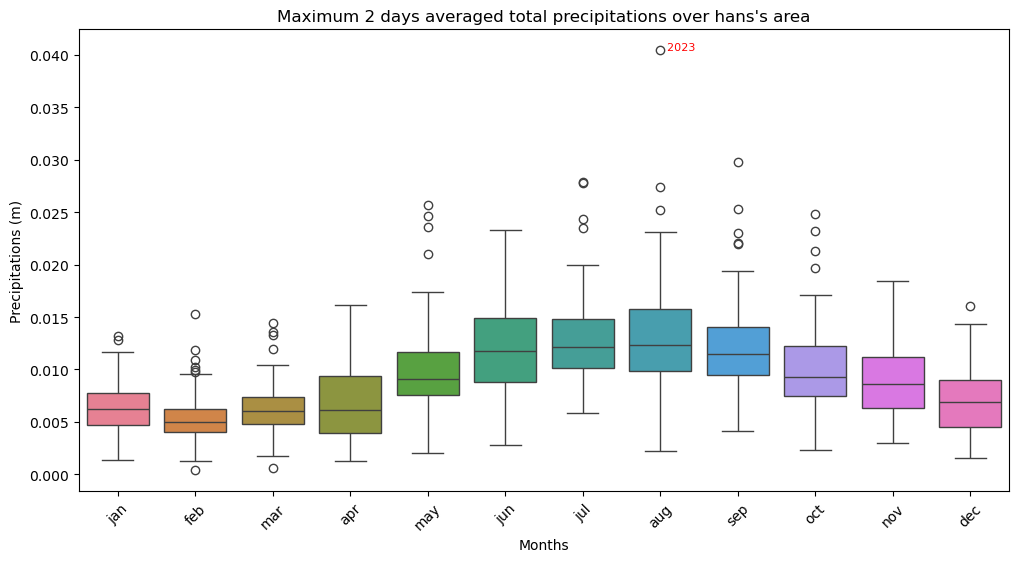

In [41]:
plot_boxplot(maxMean2Values, 0.03, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/max-mean2_tp_hans-area.png', "Maximum 2 days averaged total precipitations over hans's area")

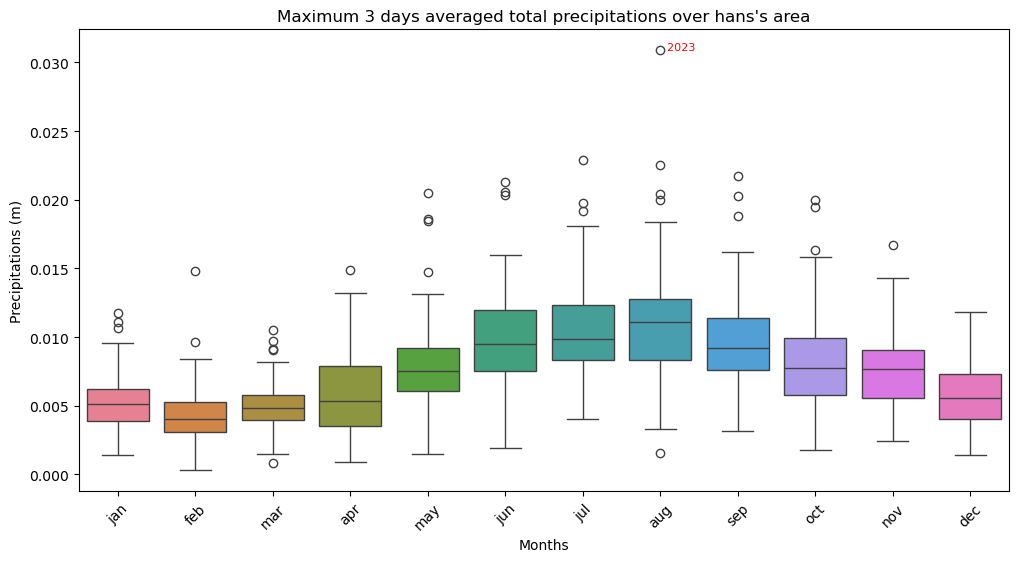

In [42]:
plot_boxplot(maxMean3Values, 0.025, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/max-mean3_tp_hans-area.png', "Maximum 3 days averaged total precipitations over hans's area")

## Plot tp / date

In [43]:
def plot_values(dates_values, path, title):
    """
    Trace un graphique des valeurs en fonction des dates avec des marques chaque semaine.
    
    :param dates_values: Liste de tuples (valeur, date) où date est une chaîne au format 'YYYY-MM-DD'
    """
    # Trier les données par date
    dates_values.sort(key=lambda x: x[1])
    
    # Séparer les valeurs et les dates
    values = [val for val, _ in dates_values]
    dates = [date for _, date in dates_values]
    
    # Déterminer la première date pour numéroter les semaines
    min_date = min(dates)
    
    # Identifier les lundis et leurs numéros de semaine
    week_labels = {}
    for date in dates:
        delta_time = (date - min_date).astype('datetime64[D]').astype(int)
        week_number = (delta_time // 7) + 1
        if (delta_time % 7) == 0:  # Lundi
            week_labels[date] = f"Week {week_number}"
    
    # Création du graphique
    plt.figure(figsize=(12, 6))
    plt.plot(dates, values, marker='o', linestyle='-')
    
    # Formatage de l'axe des abscisses
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Marques pour chaque jour
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format par défaut
    plt.xticks(ticks=list(week_labels.keys()), labels=list(week_labels.values()), rotation=45)
    
    plt.ylabel("total precipitation (m)")
    plt.title(title)
    
    plt.grid(True)
    plt.savefig(path)
    plt.show()

In [44]:
with open('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg_0.25_daily.pkl', 'rb') as inp:
    data = pickle.load(inp)

In [45]:
hans_august = [
    (data[day],day) for day in np.arange(np.datetime64('2023-08'), np.datetime64('2023-09'), np.timedelta64(1,'D'))
]

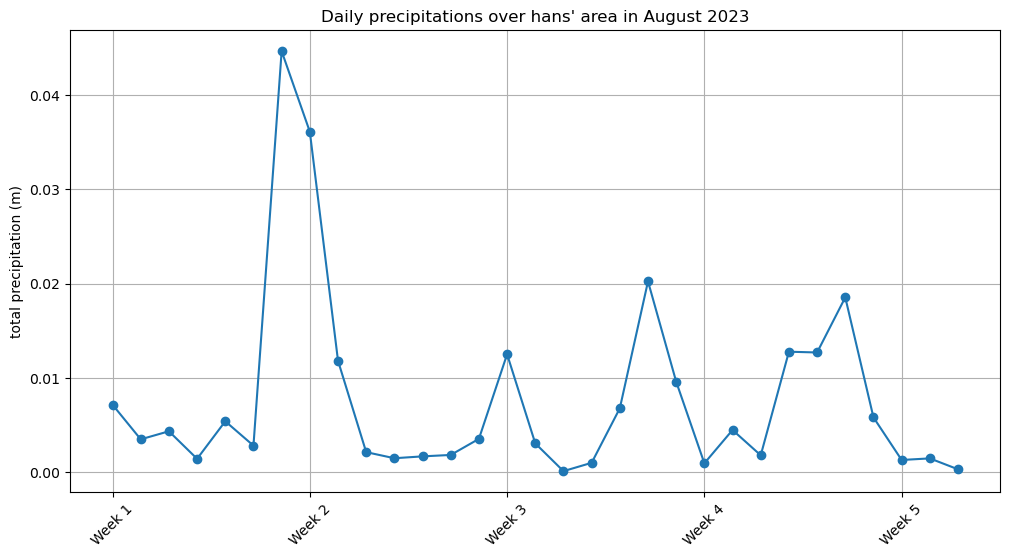

In [46]:
plot_values(hans_august, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/august-daily_tp_hans-area.png', "Daily precipitations over hans' area in August 2023")

In [47]:
alphaMonths = {
    1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"jun",
    7:"jul", 8:"aug", 9:"sep", 10:"oct", 11:"nov", 12:"dec" 
}

In [48]:
def plot_annual(dates_values, path, title):
    """
    Trace un graphique des valeurs en fonction des dates avec des marques pour chaque jour,
    mais n'affiche que le premier du mois sous le format du nom du mois.

    :param dates_values: Liste de tuples (valeur, date) où date est au format np.datetime64
    """
    # Trier les données par date
    dates_values.sort(key=lambda x: x[1])

    # Séparer les valeurs et les dates
    values = [val for val, _ in dates_values]
    dates = np.array([date for _, date in dates_values], dtype='datetime64[D]')

    # Trouver le premier jour de chaque mois
    unique_months = np.unique(dates.astype('datetime64[M]'))
    first_days = np.array([np.datetime64(f"{str(m)}-01") for m in unique_months])

    # Création du graphique
    plt.figure(figsize=(12, 6))
    plt.bar(dates, values, width=np.timedelta64(1, 'D'), align='center')  # Barres de 1 jours de large

    # Formatage de l'axe des abscisses
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Marques pour chaque jour
    plt.xticks(ticks=first_days, labels=[alphaMonths[m.astype(int) % 12 + 1] for m in unique_months], rotation=45)

    plt.ylabel("Total precipitation (m)")
    plt.title(title)

    plt.grid(True)
    plt.savefig(path)
    plt.show()


In [49]:
hans_2023 = [
    (data[day],day) for day in np.arange(np.datetime64('2023'), np.datetime64('2024'), np.timedelta64(1,'D'))
]

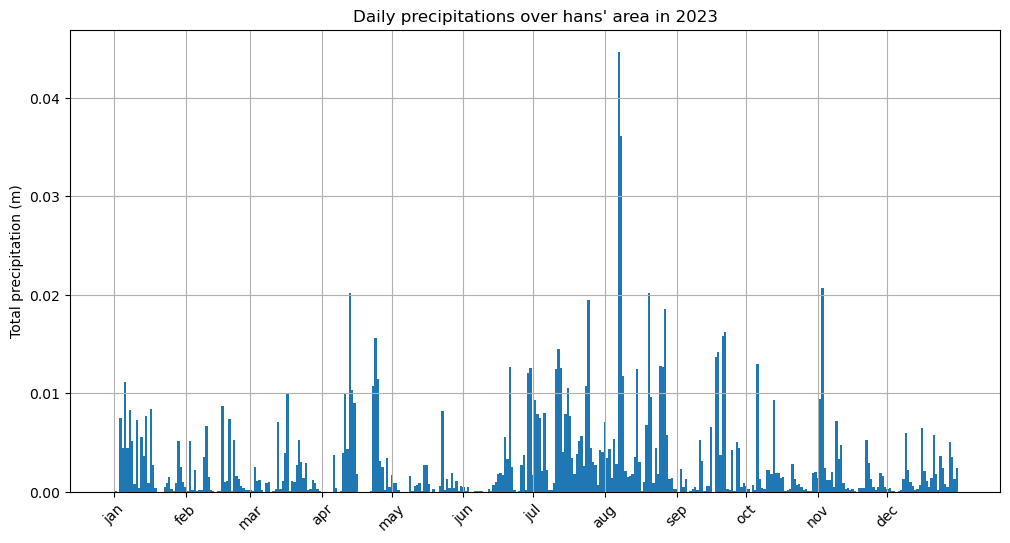

In [50]:
plot_annual(hans_2023, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/2023-daily_tp_hans-area.png', "Daily precipitations over hans' area in 2023")

In [51]:
with open('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean2_0.25_daily.pkl', 'rb') as inp:
    mean2 = pickle.load(inp)
with open('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean3_0.25_daily.pkl', 'rb') as inp:
    mean3 = pickle.load(inp)

In [52]:
hans_mean2_august = [
    (mean2[day],day) for day in np.arange(np.datetime64('2023-08'), np.datetime64('2023-09'), np.timedelta64(1,'D'))
]
hans_mean2_2023 = [
    (mean2[day],day) for day in np.arange(np.datetime64('2023'), np.datetime64('2024'), np.timedelta64(1,'D'))
]
hans_mean3_august = [
    (mean3[day],day) for day in np.arange(np.datetime64('2023-08'), np.datetime64('2023-09'), np.timedelta64(1,'D'))
]
hans_mean3_2023 = [
    (mean3[day],day) for day in np.arange(np.datetime64('2023'), np.datetime64('2024'), np.timedelta64(1,'D'))
]

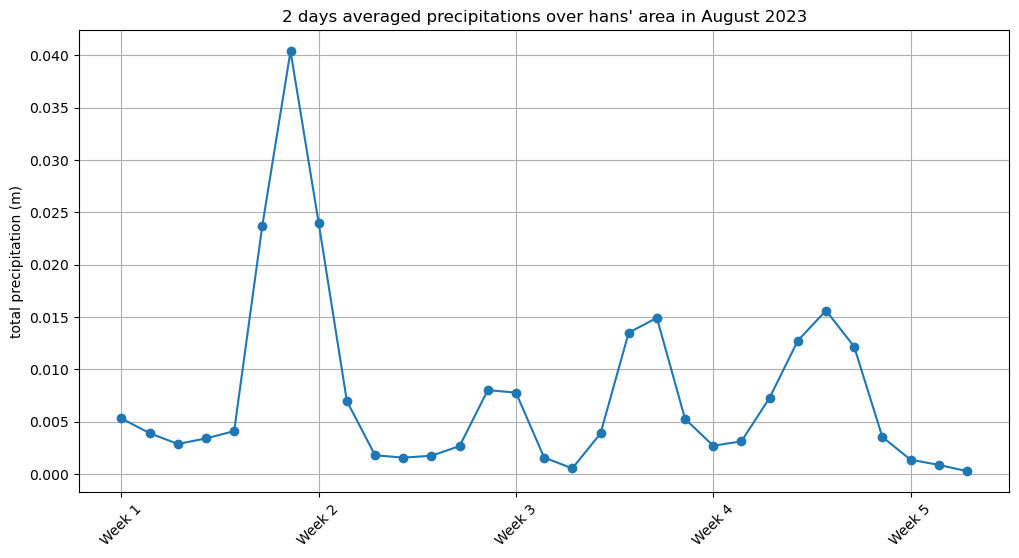

In [53]:
plot_values(hans_mean2_august, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/august-mean2_tp_hans-area.png', "2 days averaged precipitations over hans' area in August 2023")

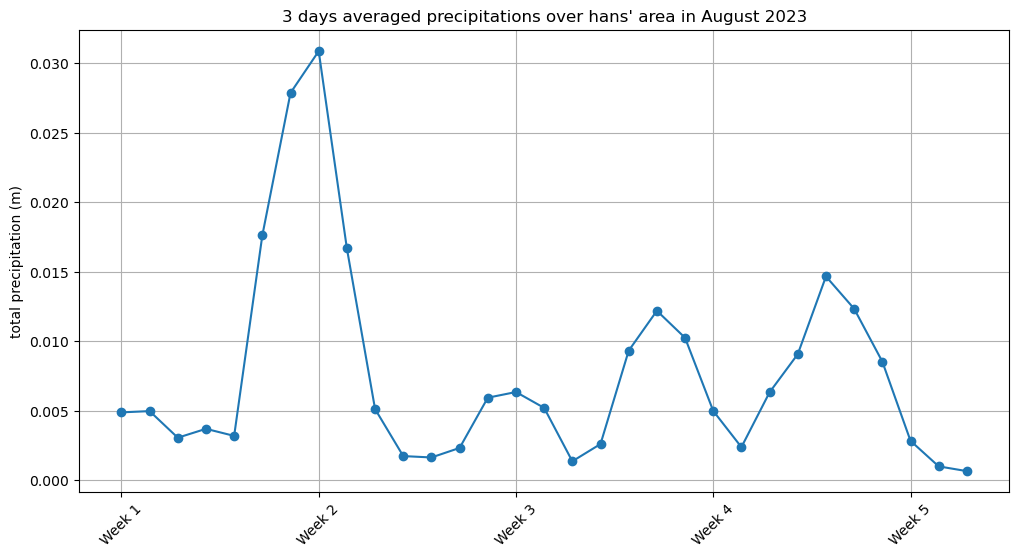

In [54]:
plot_values(hans_mean3_august, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/august-mean3_tp_hans-area.png', "3 days averaged precipitations over hans' area in August 2023")

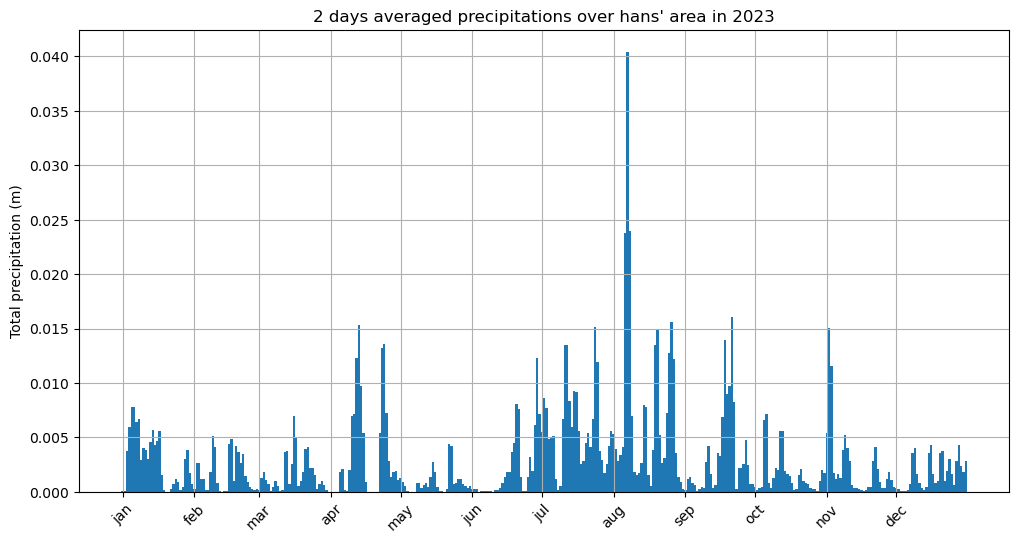

In [55]:
plot_annual(hans_mean2_2023, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/2023-mean2_tp_hans-area.png', "2 days averaged precipitations over hans' area in 2023")

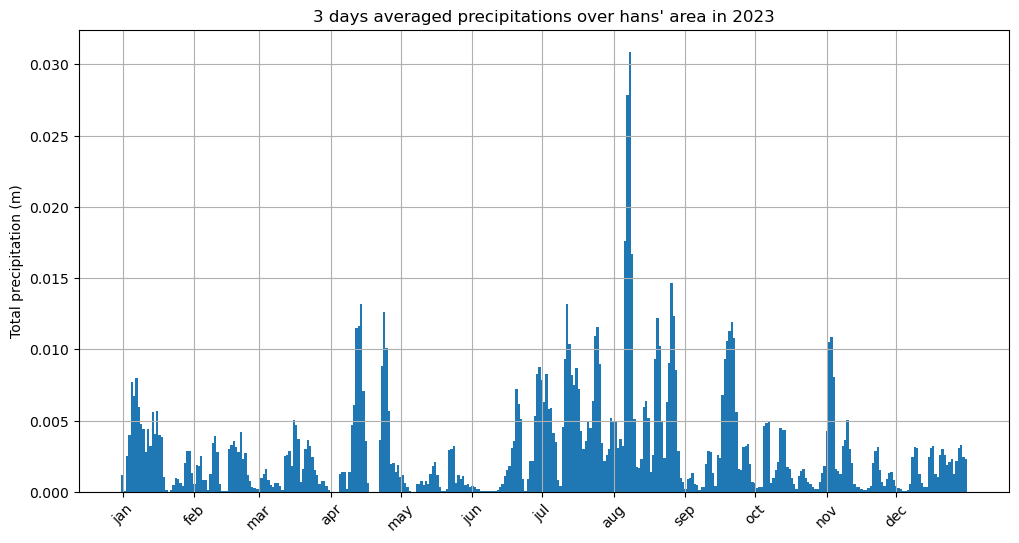

In [56]:
plot_annual(hans_mean3_2023, '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/2023-mean3_tp_hans-area.png', "3 days averaged precipitations over hans' area in 2023")